# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Função-Softmax" data-toc-modified-id="Função-Softmax-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Função Softmax</a></div><div class="lev2 toc-item"><a href="#Softmax" data-toc-modified-id="Softmax-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Softmax</a></div><div class="lev3 toc-item"><a href="#Softmax-para-uma-amostra" data-toc-modified-id="Softmax-para-uma-amostra-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Softmax para uma amostra</a></div><div class="lev3 toc-item"><a href="#Softmax-para-várias-amostras" data-toc-modified-id="Softmax-para-várias-amostras-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Softmax para várias amostras</a></div><div class="lev2 toc-item"><a href="#Importação-dos-módulos" data-toc-modified-id="Importação-dos-módulos-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importação dos módulos</a></div><div class="lev2 toc-item"><a href="#Implementação-matricial-do-Softmax-para-várias-amostras" data-toc-modified-id="Implementação-matricial-do-Softmax-para-várias-amostras-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementação matricial do Softmax para várias amostras</a></div><div class="lev2 toc-item"><a href="#Testando-a-implementação" data-toc-modified-id="Testando-a-implementação-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Testando a implementação</a></div><div class="lev2 toc-item"><a href="#Visualizando-a-variação-dos-valores-no-gráfico" data-toc-modified-id="Visualizando-a-variação-dos-valores-no-gráfico-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualizando a variação dos valores no gráfico</a></div><div class="lev2 toc-item"><a href="#Variando-os-scores-de-cada-uma-das-3-classes-interativamente" data-toc-modified-id="Variando-os-scores-de-cada-uma-das-3-classes-interativamente-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Variando os scores de cada uma das 3 classes interativamente</a></div><div class="lev2 toc-item"><a href="#Variando-se-um-fator-multiplicativo-nos-scores-das-classes" data-toc-modified-id="Variando-se-um-fator-multiplicativo-nos-scores-das-classes-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Variando-se um fator multiplicativo nos scores das classes</a></div><div class="lev2 toc-item"><a href="#Atividades" data-toc-modified-id="Atividades-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Atividades</a></div>

# Função Softmax 

A função softmax é um dos blocos básicos de redes neurais. Ela é usualmente utilizada em classificação multiclasses. Ela transforma valores ("scores", "logits") em probabilidades.
Nesse tutorial, iremos:
1. Ver a definição da função softmax, 
2. Implementá-la via programação matricial e 
3. Explorar o comportamento da saída variando de forma interativa os parâmetros de entrada.

## Softmax

A função softmax transforma um conjunto de valores ("scores", "logits") e os transforma em probabilidades, de forma que a soma das probabilidades seja igual a 1. Ela é adequada para problemas de classificação com mais de uma classe.

<img src='../figures/softmax.png', width=600>

### Softmax para uma amostra

A equação Softmax de $K$ saídas, uma para cada classe, para processar uma amostra é dada por:

$$ Softmax(\mathbf{z}) = \frac{e^{\mathbf{z}}}{\sum_{j=0}^{K-1}e^{z_j}} $$

Abrindo as matrizes, para maior facilidade de visualização:

$$ Softmax(\left [  z_0 z_1 \ldots z_{K-1} \right ]) = \left [ \frac{e^{z_0}}{\sum_{i=0}^{K-1} e^{z_i}} \frac{e^{z_1}}{\sum_{i=0}^{K-1} e^{z_i}} \ldots \frac{e^{z_{K-1}}}{\sum_{i=0}^{K-1} e^{z_i}} \right ] $$

### Softmax para várias amostras

Para aumentar a eficiência de processamento, é usual processar várias classes
simultaneamente, utilizando implementação matricial.

Quando se tem $M$ amostras, o vetor $\mathbf{z}$ passa a ser uma matriz $\mathbf{Z}$  bidimensional - $K$ classes, uma em cada coluna e $M$ amostras, uma em cada linha.

$$ \mathbf{Z} = z_{i,j}; i \in (0,1,\ldots, M-1); j \in (0,1, \ldots, K-1) $$

$$ Softmax(\mathbf{Z}) = \frac{e^{\mathbf{Z}}}{\sum_{j=0}^{K-1}e^{z_{i,j}}} $$

$$
Softmax(\begin{bmatrix}  
z_{0,0} & z_{0,1} & \ldots & z_{0,K-1} \\
z_{1,0} & z_{1,1} & \ldots & z_{1,K-1} \\
\vdots & \vdots & & \vdots \\
z_{M-1,0} & z_{M-1,1} & \ldots & z_{M-1,K-1} 
 \end{bmatrix}) = 
\begin{bmatrix}
\frac{e^{z_{0,0}}}{\sum_{j=0}^{K-1} e^{z_{0,j}}}& \frac{e^{z_{0,1}}}{\sum_{j=0}^{K-1} e^{z_{0,j}}} & \ldots & \frac{e^{z_{0,K-1}}}{\sum_{j=0}^{k-1} e^{z_{0,j}}} \\
\frac{e^{z_{1,0}}}{\sum_{j=0}^{K-1} e^{z_{1,j}}}& \frac{e^{z_{1,1}}}{\sum_{j=0}^{K-1} e^{z_{1,j}}} & \ldots & \frac{e^{z_{1,K-1}}}{\sum_{j=0}^{k-1} e^{z_{1,j}}} \\
\vdots & \vdots & & \vdots \\
\frac{e^{z_{M-1,0}}}{\sum_{j=0}^{K-1} e^{z_{M-1,j}}}& \frac{e^{z_{M-1,1}}}{\sum_{j=0}^{K-1} e^{z_{M-1,j}}} & \ldots & \frac{e^{z_{M-1,K-1}}}{\sum_{j=0}^{K-1} e^{z_{M-1,j}}} \\
\end{bmatrix}
$$

## Importação dos módulos

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

np.set_printoptions(suppress=True, precision=3) # limita a precisão da impressão em 3 casas decimais 

#Instalar e setar no jupyter: jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets


## Implementação matricial do Softmax para várias amostras

A implementação matricial usando o NumPy é baseado na equação matricial, repetida aqui:

$$ Softmax(\mathbf{Z}) = \frac{e^{\mathbf{Z}}}{\sum_{j=0}^{K-1}e^{z_{i,j}}} $$

Note que o código é muito sucinto e quase que diretamente traduzido da equação:
1. Calcula-se o exponencial da matriz Z, em seguida,
2. Divide-se pela soma dos scores de cada amostra, soma no eixo j. Lembrando que são
dois eixos (i,j), em NumPy o primeiro eixo é 0 e o segundo eixo é 1. Deve-se dividir pela
soma no eixo 1. A opção `keeepdims` permite que após esta soma, é como se o resultado fosse do mesmo tamanho da matriz original, de modo que a divisão ocorra elemento a elemento.

In [3]:
def softmax(Z):
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims = True)
    return S

## Testando a implementação

A implementação será testada com a matriz score onde a primeira classe tem os valores variando de -2 até 6, a segunda classe tem valor fixo 1 e a terceira classe também tem valor fixo 0.2.
Observa-se que na saída softmax, a soma dos elementos de cada amostra é 1.

In [4]:
X = np.linspace(-2, 6.0, 10).reshape(-1, 1)
scores = np.hstack(
    [X, np.ones_like(X), 0.2 * np.ones_like(X)])  # 3 classes nas colunas
S = softmax(scores)
print('scores=\n', scores)
print('S=\n', S)

scores=
 [[-2.     1.     0.2  ]
 [-1.111  1.     0.2  ]
 [-0.222  1.     0.2  ]
 [ 0.667  1.     0.2  ]
 [ 1.556  1.     0.2  ]
 [ 2.444  1.     0.2  ]
 [ 3.333  1.     0.2  ]
 [ 4.222  1.     0.2  ]
 [ 5.111  1.     0.2  ]
 [ 6.     1.     0.2  ]]
S=
 [[ 0.033  0.667  0.3  ]
 [ 0.077  0.637  0.286]
 [ 0.169  0.573  0.258]
 [ 0.331  0.462  0.207]
 [ 0.546  0.313  0.141]
 [ 0.745  0.176  0.079]
 [ 0.877  0.085  0.038]
 [ 0.945  0.038  0.017]
 [ 0.977  0.016  0.007]
 [ 0.99   0.007  0.003]]


## Visualizando a variação dos valores no gráfico

Repete-se o mesmo exemplo, porém agora com mais valores observando o resultado do software num gráfico. 

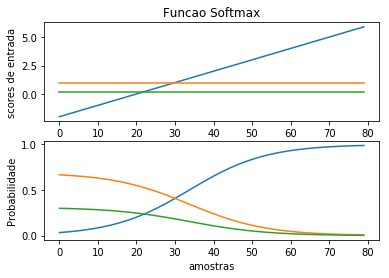

In [5]:
X = np.arange(-2.0, 6.0, 0.1).reshape(-1,1) # matriz n,1
i = np.arange(X.size)
scores = np.hstack([X, np.ones_like(X), 0.2 * np.ones_like(X)]) # 3 classes nas colunas
S = softmax(scores)

f, (ax1, ax2) = plt.subplots(2, 1, sharey=False)
ax2.set_xlabel("amostras")
ax1.set_ylabel("scores de entrada")
ax2.set_ylabel("Probabilidade")
ax1.plot(i, scores)
ax1.set_title('Funcao Softmax')
ax2.plot(i, S)

## Variando os scores de cada uma das 3 classes interativamente

Exemplo com os `widgets` interativos do Jupyter onde é possível alterar os scores de cada uma das classes e ver o resultado do softmax no gráfico.


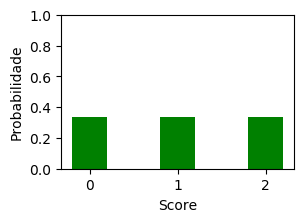

<function __main__.plotmodel>

In [6]:
def plotmodel(s1,s2,s3):
    scores = np.array([[s1, s2, s3]]) # shape: (1,3) 1 amostra e 3 classes
    S = softmax(scores)[0] # amostra 0
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    classes = ('0', '1', '2')
    x_pos = [2,4,6]
    ax.bar(x_pos, S, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(classes)
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
widgets.interact(plotmodel,s1 = (1,10,.1),s2 = (1,10,.1),s3 = (1,10,.1))
                       


## Variando-se um fator multiplicativo nos scores das classes

Se os scores forem multiplicados, a variação entre as probabilidades de saída ficam bastante realçadas, é como se aumentasse o contraste das diferenças entre as probabilidades. Por outro lado, se for aplicado um fator de divisão, ocorre o contrário, a diferença entre as probabilidades ficam mais parecidas.


s1: 4.9
s2: 5.5
s3: 6.0


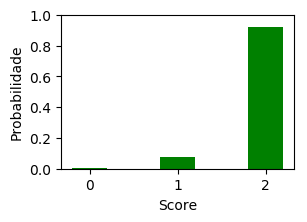

<function __main__.plotmodel2>

In [7]:
def plotmodel2(M, s1,op):
    scores = np.array([[s1, 5.5, 6]])
    print("s1:",scores[0,0])
    print("s2:",scores[0,1])
    print("s3:",scores[0,2])
    
    if op == 1:
        S = softmax(scores*M)[0]
    else:
        S = softmax(scores/M)[0]
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    classes = ('0', '1', '2')
    x_pos = [2,4,6]
    ax.bar(x_pos, S, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(classes)
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
widgets.interact(plotmodel2,M = (1,10,1),s1 = (1,10,.1),op = {'Multiplication':1,'Division':2})

## Atividades

1. Observe a variação entre as probabilidades em função da variação dos scores de entrada utilizando-se as ferramentas interativas.
